# Handling outliers
- Handling outliers is an essential step in data preprocessing, as outliers can negatively affect the performance of machine learning models by introducing noise or skewing results.
- Below are several techniques for handling outliers effectively:

## 1. Identifying Outliers
- Before handling outliers, it's crucial to identify them using statistical methods or visualization tools:

### Statistical Methods:
#### Z-Score: 
- Measures how far a data point is from the mean, with values above a threshold (e.g., 3 or -3) indicating outliers.
#### IQR (Interquartile Range): 
- Identifies outliers by considering data outside 1.5 times the IQR above or below the first and third quartiles.

#### Visualization:
- Box Plots and Scatter Plots help visualize outliers in datasets.


In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore  

In [2]:
# Load Titanic dataset
df = sns.load_dataset('titanic')
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [11]:
# Identifying Outliers
# using z test 
# Calculate z-score for age
df['z_score'] = np.abs(zscore(df['age']))

# Define threshold for outliers
threshold = 3
outliers_z_score = df[df['z_score'] > threshold]
print(outliers_z_score)


Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone, age_winsorized, age_scaled, z_score]
Index: []


In [4]:
# using IQR
# Compute IQR for age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers_iqr = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]
print(outliers_iqr)


     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
33          0       2  male  66.0      0      0  10.5000        S  Second   
54          0       1  male  65.0      0      1  61.9792        C   First   
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
280         0       3  male  65.0      0      0   7.7500        Q   Third   
456         0       1  male  65.0      0      0  26.5500        S   First   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  
33   man        True 

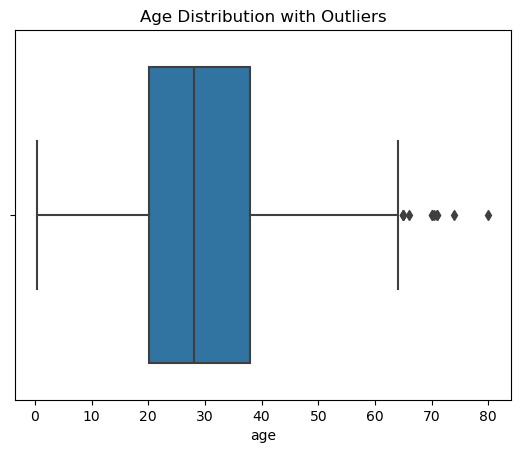

In [5]:
# Visualization of Outliers
sns.boxplot(data=df, x='age')
plt.title('Age Distribution with Outliers')
plt.show()


In [6]:
#  Handling Outliers
# a. Winsorization
def winsorize(data, lower_percentile=5, upper_percentile=95):
    lower_limit = np.percentile(data, lower_percentile)
    upper_limit = np.percentile(data, upper_percentile)
    data_winsorized = np.clip(data, lower_limit, upper_limit)
    return data_winsorized

df['age_winsorized'] = winsorize(df['age'])


C:\Users\USER\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return bound(*args, **kwds)


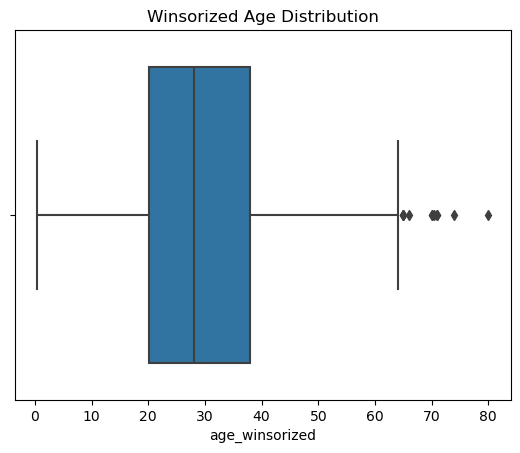

In [8]:
sns.boxplot(data=df, x='age_winsorized')
plt.title('Winsorized Age Distribution')
plt.show()


In [7]:
# b. Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])


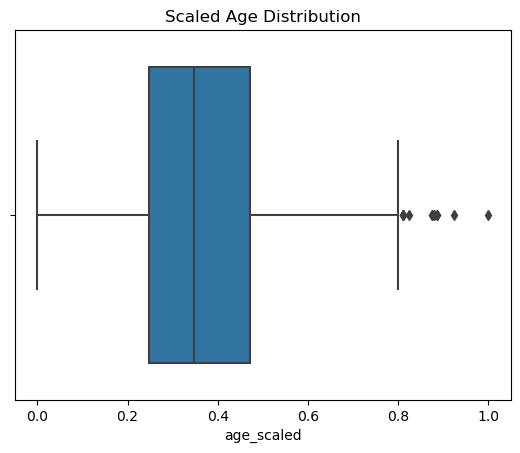

In [9]:
sns.boxplot(data=df, x='age_scaled')
plt.title('Scaled Age Distribution')
plt.show()


# Techniques for Handling Outliers

##  Data Transformation

#### Data Smoothing:
- It is a technique used in data preprocessing to reduce noise and fluctuations, allowing significant patterns or trends to emerge more clearly.
- Here's a detailed overview of its purpose and the common techniques:

#### Purpose of Data Smoothing
- Noise Reduction: Eliminates minor variations or inconsistencies in the dataset that might obscure important trends.
- Trend Analysis: Makes underlying trends in the data more visible by reducing volatility.
- Improved Model Performance: Helps predictive models by providing cleaner data, reducing the impact of outliers or noise on the model's learning process.

### Techniques for Data Smoothing
#### 1. Moving Average
- Description: Averages data points over a fixed-size sliding window.
- How it Works: Each value is replaced with the mean of neighboring points within the window.
##### Application:
- Time-series data (e.g., stock prices, temperature data).
- Reducing short-term fluctuations.

In [13]:
import pandas as pd

data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
df = pd.DataFrame(data, columns=['Value'])
df['Moving Average'] = df['Value'].rolling(window=3).mean()

print(df)


   Value  Moving Average
0      1             NaN
1      2             NaN
2      3             2.0
3      4             3.0
4      5             4.0
5      6             5.0
6      7             6.0
7      8             7.0
8      9             8.0


### 2. Exponential Smoothing
#### Description: 
- Gives more weight to recent observations while smoothing the data.
#### How it Works:
- A smoothing factor (𝛼) determines how much weight is given to past data.
#### Application:
- Forecasting and time-series analysis.

In [14]:
df['Exponential Smoothing'] = df['Value'].ewm(alpha=0.3).mean()
print(df)


   Value  Moving Average  Exponential Smoothing
0      1             NaN               1.000000
1      2             NaN               1.588235
2      3             2.0               2.232877
3      4             3.0               2.930517
4      5             4.0               3.676788
5      6             5.0               4.466682
6      7             6.0               5.294883
7      8             7.0               6.156064
8      9             8.0               7.045121


### 3. Gaussian Smoothing
#### Description: 
- Applies a Gaussian (normal distribution) kernel to the data.
#### How it Works: 
- Weights data points using a Gaussian curve, with more emphasis on closer points.
#### Application:
- Image processing (e.g., blurring).
- Signal processing.


In [15]:
import numpy as np
from scipy.ndimage import gaussian_filter

data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
smoothed_data = gaussian_filter(data, sigma=1)

print(smoothed_data)


[1 2 3 4 5 5 6 7 8]


### 4. Median Filtering
#### Description: 
- Replaces each data point with the median of neighboring points within a window.
#### How it Works: 
- Non-linear technique that reduces noise without blurring edges.
#### Application:
- Removing outliers.
- Data with abrupt changes (e.g., image edge detection).

In [16]:
from scipy.ndimage import median_filter

data = [1, 2, 100, 4, 5, 6, 7, 8, 9]
smoothed_data = median_filter(data, size=3)

print(smoothed_data)


[1 2 4 5 5 6 7 8 9]


## Techniques for Attribute Construction
### 1. Polynomial Features
#### Description: 
- Involves generating higher-order features by raising existing features to a power or creating interaction terms.
#### Use Case: 
- Captures non-linear relationships between features and the target variable.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Example data
data = {'Feature1': [1, 2, 3], 'Feature2': [4, 5, 6]}
df = pd.DataFrame(data)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df)

# Convert to DataFrame for inspection
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out())
print(poly_df)


   Feature1  Feature2  Feature1^2  Feature1 Feature2  Feature2^2
0       1.0       4.0         1.0                4.0        16.0
1       2.0       5.0         4.0               10.0        25.0
2       3.0       6.0         9.0               18.0        36.0


### 2. Interaction Features
#### Description: 
- Interaction terms are features created by multiplying two or more existing features. These terms capture the combined effect of features.
#### Use Case: 
- Useful when the relationship between features and the target is not additive.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Example data
data = {'Feature1': [1, 2, 3], 'Feature2': [4, 5, 6]}
df = pd.DataFrame(data)

# Generate interaction features only
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(df)

# Convert to DataFrame for inspection
interaction_df = pd.DataFrame(interaction_features, columns=poly.get_feature_names_out())
print(interaction_df)


   Feature1  Feature2  Feature1 Feature2
0       1.0       4.0                4.0
1       2.0       5.0               10.0
2       3.0       6.0               18.0


# Data Aggregation
### Purpose:
- Data aggregation involves summarizing or condensing large datasets into smaller, meaningful representations by grouping and applying mathematical operations like summation, averaging, or counting.
- This process reduces data dimensionality, helps uncover patterns, and facilitates analysis.



## Techniques for Data Aggregation
### 1. Summation
#### Description: 
- Calculates the total sum of values in each group.
#### Use Case: 
- Common in financial, sales, or inventory data to find total revenue, sales, or stock levels.

In [19]:
import pandas as pd

# Example data
data = {'Category': ['A', 'B', 'A', 'B'], 'Value': [10, 20, 15, 25]}
df = pd.DataFrame(data)

# Aggregation using sum
result = df.groupby('Category')['Value'].sum().reset_index()
print(result)


  Category  Value
0        A     25
1        B     45


### 2. Averaging
- Description: Computes the mean of values within each group.
- Use Case: Used to find average sales, temperature, or customer ratings

In [20]:
result = df.groupby('Category')['Value'].mean().reset_index()
print(result)


  Category  Value
0        A   12.5
1        B   22.5


### 3. Maximum/Minimum
- Description: Finds the maximum or minimum value within each group.
- Use Case: Useful in monitoring systems (e.g., maximum CPU usage) or time series data (e.g., daily high/low temperatures).

In [21]:
result_max = df.groupby('Category')['Value'].max().reset_index()
result_min = df.groupby('Category')['Value'].min().reset_index()
print(result_max)
print(result_min)


  Category  Value
0        A     15
1        B     25
  Category  Value
0        A     10
1        B     20


### 4. Frequency Counts
- Description: Counts the number of occurrences for each category.
- Use Case: Common in categorical data analysis to find the popularity of items or activities

In [24]:
result = df['Category'].value_counts().reset_index()
result.columns = ['Category', 'Frequency']
print(result)


  Category  Frequency
0        A          2
1        B          2


# Data Discretization
## Purpose:
- Data discretization transforms continuous data into discrete categories or bins.
- This is useful for algorithms that perform better with categorical data, reduces data complexity, and improves interpretability.

## Techniques for Data Discretization
### 1. Equal Width Binning
- Description: Divides the range of the continuous variable into 𝑘 intervals of equal size.
- Use Case: Useful when the data distribution is uniform.

In [25]:
import pandas as pd

# Example data
data = {'Value': [1, 3, 5, 7, 9, 11]}
df = pd.DataFrame(data)

# Equal width binning
df['Equal_Width_Bins'] = pd.cut(df['Value'], bins=3, labels=['Low', 'Medium', 'High'])
print(df)


   Value Equal_Width_Bins
0      1              Low
1      3              Low
2      5           Medium
3      7           Medium
4      9             High
5     11             High


## 2. Equal Frequency Binning
- Description: Divides data into 𝑘 bins such that each bin contains approximately the same number of data points.
- Use Case: Suitable for skewed distributions where equal-width bins might leave some bins sparsely populated.

In [26]:
# Equal frequency binning
df['Equal_Frequency_Bins'] = pd.qcut(df['Value'], q=3, labels=['Low', 'Medium', 'High'])
print(df)


   Value Equal_Width_Bins Equal_Frequency_Bins
0      1              Low                  Low
1      3              Low                  Low
2      5           Medium               Medium
3      7           Medium               Medium
4      9             High                 High
5     11             High                 High


## 3. Clustering-Based Discretization
- Description: Uses clustering algorithms (e.g., K-means) to group continuous values into clusters, treating each cluster as a bin.
- Use Case: Ideal when data shows natural groupings that are not captured by fixed-width or frequency-based bins.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Example data
values = np.array([[1], [3], [5], [7], [9], [11]])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(values)

# Add clusters to DataFrame
df['Cluster_Bins'] = clusters
print(df)


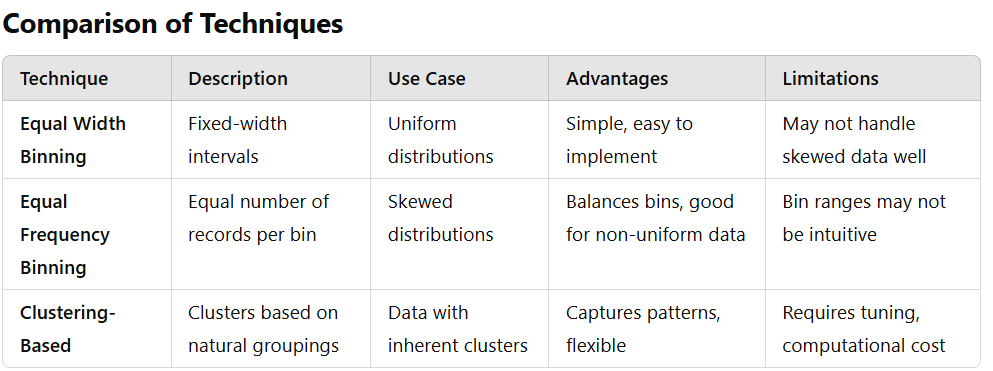

In [29]:
from IPython.display import Image, display

# Path to your local image file
image_path = "D:\images\datatechn.png"

# Display the image
display(Image(filename=image_path))
